# Material de aula - FACENS - Redes Neurais e Deep Learning

In [ ]:
#Neste versão o bias não é incluido dentro do vetor de pesos e os calculos são separados

## MLP e Aproximação de Funções - Laboratório 02

In [1]:
#CÉLULA MLP-LIB-01
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#CÉLULA MLP-LIB-02
def loadDataFile(filename) :
    '''
    Esta função faz o carregamento de dados de um arquivo separado por virgulas (csv)
    
    Parametros
    -----------
    filename -> nome do arquivo de dados em formato csv
    
    
    Retorno
    -----------  
    dataframe contendo os dados do arquivo formatados numericamente.
    '''
    
    dfFile = pd.read_csv(filename, sep=';', decimal=',', thousands='.')
    return dfFile

In [3]:
#CÉLULA MLP-LIB-03
def sigmoid(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo sigmoide
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função sigmoide correspondente ao parametro z
    '''
    return (1/(1+np.exp(-z)))

In [4]:
#CÉLULA MLP-LIB-04
def tanh_function(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo tangente hiperbolica
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função tangente hiperbolica correspondente ao parametro z
    '''
    return np.tanh(z)

In [5]:
#CÉLULA MLP-LIB-05
def forward_step(vInputs, vWeights, vBias) : 
    '''
    Processa o forward step
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna uma tupla contendo a saída das camadas do MLP
    (Y_1, Y_2)
    '''
    
    W_1 = vWeights[0]
    W_2 = vWeights[1]
    
    B_1 = vBias[0]
    B_2 = vBias[1]
    
    #FORWARD STEP
    #Calcula saída do MLP para todas as amostras, de uma vez.
    Y_0 = vInputs #so para ficar uniforme a nomenclatura dos termos
    I_1 = W_1 @ Y_0 + B_1
    Y_1 = sigmoid(I_1) #Função sigmoide na camada oculta, g1

    I_2 = W_2 @ Y_1 + B_2
    Y_2 = I_2 #Função linear na camada de saida, g2
    #FIM DO FORWARD STEP
    
    return (Y_1, Y_2)

In [6]:
#CÉLULA MLP-LIB-06
def calcMSE(vInputs, vOutputs, vWeights, vBias) : 
    '''
    Calcula o Erro Quadratico Medio (Mean Squared Error) do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com os vetores dos dados
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de MSE para o conjunto de dados e pesos do MLP
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)
    nSamples = vInputs.shape[1]
       
    E_k = 1/2 * (vOutputs - Y_2)**2   
    MSE = np.sum(E_k, axis=1) / nSamples
    
    return np.asscalar(MSE)

# 1 - Implementação do algoritmo de Treinamento do MLP

Utilizando Jupyter e NumPy: para o problema apresentado, construa duas funções para o cálculo do treinamento do MLP: uma para treinamento ONLINE e outra para treinamento em BATCH.

In [11]:
dfTrain = loadDataFile('Lab01_training.csv')
dfTrain.head(5)

,Amostra,x1,x2,x3,d
0,1,0.8799,0.7998,0.3972,0.8399
1,2,0.5700,0.5111,0.2418,0.6258
2,3,0.6796,0.4117,0.3370,0.6622
3,4,0.3567,0.2967,0.6037,0.5969
4,5,0.3866,0.8390,0.0232,0.5316


## 1.1 - Implemente o código que realiza o treinamento em Batch

In [25]:
#CÉLULA MLP-LIB-07
def mlp_train_batch(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    
    #Determine numero de entradas do MLP e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = 0 #para aproximação de função não seu usa bias na camada de saida;
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
    
    for epochCounter in range(max_epochs) :
        Y_0 = vInputs #esta atribuição é apenas para manter uniformidade de nomenclatura
        (Y_1, Y_2) = forward_step(vInputs, [W_1, W_2], [B_1, B_2])       

        #INICIO - BACKWARD STEP 
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA
        diff_g2 = 1
        delta_2 = (vOutputs - Y_2) * diff_g2
        #A derivada de g2 é igual a Y_2 * (1 - Y_2)

        
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste dos pesos
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #AJUSTE OS VALORES DE W_2 E B_2
        
        W_2 += eta * delta_2 @ Y_1.T
        B_2 = 0
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste de pesos Camada Entrada - Camada Oculta
        #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
        diff_g1 = Y_1 * (1 - Y_1)
        delta_1 = (W_2.T @ delta_2) * diff_g1


        #Gradiente local
        
        #Ajuste dos pesos
        W_1 += eta * delta_1 @ Y_0.T
        B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                
        #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break
    
    return (W_1, W_2, B_1, B_2, MSE)

## 1.2 - Implemente o código que realiza o treinamento ONLINE

In [33]:
#CÉLULA MLP-LIB-07
def mlp_train_online(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    
    #IMPLEMENTE O CÓDIGO AQUI
    #DICA: FAÇA FUNCIONAR O TREINAMENTO PARA O MODO BATCH, COPIE E COLE O CODIGO AQUI PARA MODIFICAR PARA ONLINE
    
    #Determine numero de entradas do MLP e o numero de amostras
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);

    indexLayer    = 2
    nNeurons      = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections  = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    B_2 = 0 #para aproximação de função não seu usa bias na camada de saida;
    
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error
    
    for epochCounter in range(max_epochs) :
        for k in range(nSamples):
            Y_0 = vInputs[:, [k]] #esta atribuição é apenas para manter uniformidade de nomenclatura
            (Y_1, Y_2) = forward_step(Y_0, [W_1, W_2], [B_1, B_2])       

            #INICIO - BACKWARD STEP 
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA
            diff_g2 = 1
            Y_d = vOutputs[:,[k]]
            delta_2 = (Y_d - Y_2) * diff_g2
            #A derivada de g2 é igual a Y_2 * (1 - Y_2)


            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste dos pesos
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            #AJUSTE OS VALORES DE W_2 E B_2

            W_2 += eta * delta_2 @ Y_1.T
            B_2 = 0
            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste de pesos Camada Entrada - Camada Oculta
            #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
            diff_g1 = Y_1 * (1 - Y_1)
            delta_1 = (W_2.T @ delta_2) * diff_g1


            #Gradiente local

            #Ajuste dos pesos
            W_1 += eta * delta_1 @ Y_0.T
            B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também                
            #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
        
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))
        
        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break
    
    return (W_1, W_2, B_1, B_2, MSE)

# 2 - Implementação do algoritmo de Operação do MLP

## 2.1 - Implemente o código que realiza a operação do MLP

In [21]:
#CÉLULA MLP-LIB-08
def mlp_operation(vInputs, vWeights, vBias) :
    '''
    Algoritmo de operação do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com as saidas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de saída do MLP
    '''
    
    #IMPLEMENTE O CÓDIGO AQUI
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)
    return (Y_2)

# 3 - Implementação e testes do modelo da Rede MLP

### Para a confecção de um sistema de ressonância magnética, observou-se que é de extrema importância para o bom desempenho do processador de imagens de que a variável {y}, que mede a energia absorvida do sistema, possa ser estimada a partir da medição de três outras grandezas {x1 , x2 , x3}. 

### Entretanto, em função da complexidade do sistema, sabe-se que este mapeamento é de difícil obtenção por técnicas convencionais, sendo que o modelo matemático disponível para representação do mesmo não fornece resultados satisfatórios.

### Assim, a equipe de engenheiros e cientistas pretende utilizar uma rede perceptron multicamadas como um aproximador universal de funções, tendo-se como objetivo final de que, dado como entrada os valores de {x1 , x2 , x3}, a mesma possa estimar (após o treinamento) o respectivo valor da variável {y} que representa a energia absorvida. 

### A topologia da rede perceptron constituída de duas camadas neurais está ilustrada na figura abaixo

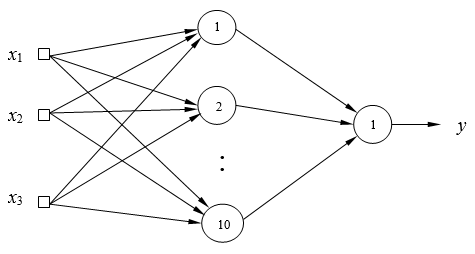


*Fonte*:  SILVA, I.N. – Sistemas Inteligentes – Notas de Aula da disciplina **Redes Neurais Artificiais** – USP São Carlos, 2012

### Utilizando o algoritmo de aprendizagem backpropagation (Regra Delta Generalizada) e os dados de treinamento apresentados no Anexo, sendo que as variáveis de entrada {x1 , x2 , x3} já estão todas normalizadas, realize as seguintes atividades:

## MLP - inicio

# 3.1 - Configuração dos hiperparâmetros

In [35]:
#CÉLULA MLP-MAIN-01
#IMPLEMENTE O CÓDIGO AQUI - INICIO
#Parâmetros
eta        = 0.1 
epsilon    = 0.0000001
nInputs    = 3
nHidden    = 10
nOutputs   = 1
max_epochs = 2000
dictLayers = {'nLayers' : 2, 'vLayers' : np.array([nInputs, nHidden, nOutputs])}

# 3.2 - Carga dos dados e execução do treinamento

In [36]:
#CÉLULA MLP-MAIN-02

#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS
# 2 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 3 - EXECUTE O TREINAMENTO E VERIFIQUE A CONVERGÊNCIA
dfTrainingFile = loadDataFile('Lab01_training.csv')
nSamples = len(dfTrainingFile['x1'])

vInputs = np.array(dfTrainingFile[['x1','x2','x3']])
vOutputs = np.array(dfTrainingFile['d'].values.reshape(nSamples,1))

(W_1, W_2, B_1, B_2, MSE) = mlp_train_online(eta, epsilon, vInputs.T, vOutputs.T, dictLayers, max_epochs)
print(W_1)
print('-------------')
print(W_2)


Epoch = 0 - MSE = 0.010917417830311478
Epoch = 1 - MSE = 0.00926601378685044
Epoch = 2 - MSE = 0.00777369990445679
Epoch = 3 - MSE = 0.006388950489259549
Epoch = 4 - MSE = 0.005113381030966884
Epoch = 5 - MSE = 0.003976464171835823
Epoch = 6 - MSE = 0.003013198744196885
Epoch = 7 - MSE = 0.0022457552897077733
Epoch = 8 - MSE = 0.001673787031924251
Epoch = 9 - MSE = 0.0012754592729066422
Epoch = 10 - MSE = 0.0010160077053024139
Epoch = 11 - MSE = 0.0008579071895015325
Epoch = 12 - MSE = 0.0007681652478030339
Epoch = 13 - MSE = 0.0007214802218610969
Epoch = 14 - MSE = 0.0007002813951119569
Epoch = 15 - MSE = 0.0006932540157384703
Epoch = 16 - MSE = 0.0006935385878444303
Epoch = 17 - MSE = 0.000697188557468571
Epoch = 18 - MSE = 0.0007020482428367364
Epoch = 19 - MSE = 0.0007070116747139723
Epoch = 20 - MSE = 0.0007115633011387811
Epoch = 21 - MSE = 0.0007155060235604465
Epoch = 22 - MSE = 0.0007188057686308216
Epoch = 23 - MSE = 0.0007215054152194758
Epoch = 24 - MSE = 0.0007236786998058

# 3.3 - Verificação dos resultados do treinamento

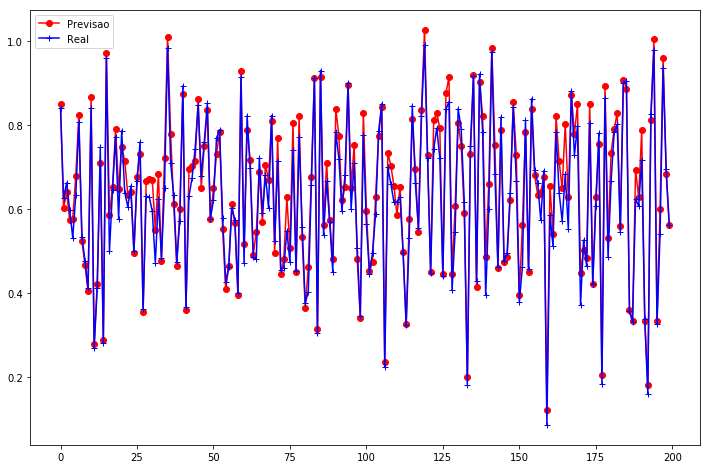

In [48]:
#Verifica resultados 
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# EXECUTE A OPERAÇÃO COM OS DADOS DE TREINAMENTO E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS

y_pred = mlp_operation(vInputs.T, [W_1, W_2], [B_1, B_2])
plt.figure(figsize=(12,8))

y_pred = y_pred.T
plt.plot(range(len(y_pred)), y_pred, 'ro-')
plt.plot(range(len(vOutputs)), vOutputs, 'b+-')
plt.gca().legend(('Previsao','Real'))

# 3.4 - Carga dos dados e execução da verificação

[[0.50733371 0.61137665 0.54828133 0.71939744 0.28756338 0.77262359
  0.58565514 0.69522391 0.55278786 0.61945741 0.70638575 0.68756111
  0.30055249 0.8056743  0.48687894 0.85243376 0.80476444 0.60953195
  0.82210128 0.51714869]]
----------
[[0.4831]
 [0.5965]
 [0.5318]
 [0.6843]
 [0.2872]
 [0.7663]
 [0.5666]
 [0.6601]
 [0.5427]
 [0.5836]
 [0.695 ]
 [0.679 ]
 [0.2956]
 [0.7742]
 [0.4662]
 [0.8093]
 [0.7581]
 [0.5826]
 [0.7938]
 [0.5012]]


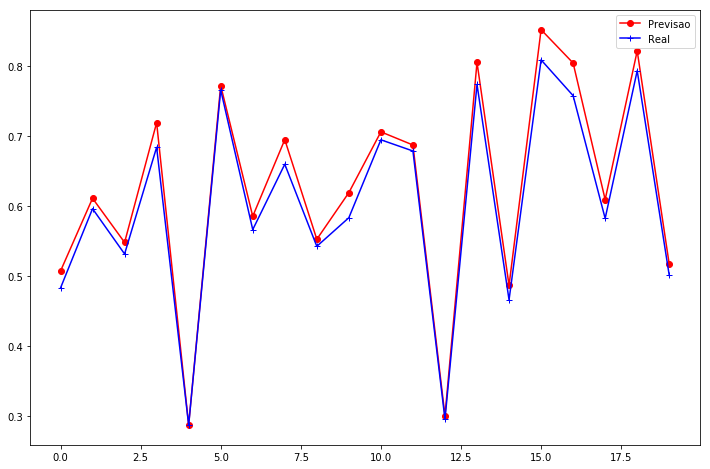

In [51]:
#Carrega dados - Teste
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS DE TESTE
# 2 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 3 - EXECUTE A OPERAÇÃO E VERIFIQUE O RESULTADO PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS

dfTestFile = loadDataFile('Lab01_operation.csv')
nSamples = len(dfTestFile['x1'])

vInputs = np.array(dfTestFile[['x1','x2','x3']])
vOutputs = np.array(dfTestFile['d'].values.reshape(nSamples,1))

y_pred = mlp_operation(vInputs.T, [W_1, W_2], [B_1, B_2])

print(y_pred)
print('----------')
print(vOutputs)
plt.figure(figsize=(12,8))

y_pred = y_pred.T
plt.plot(range(len(y_pred)), y_pred, 'ro-')
plt.plot(range(len(vOutputs)), vOutputs, 'b+-')
plt.gca().legend(('Previsao','Real'))